# Analyzing the Relationship between First Year College GPA and a Number of Other Factors


Justin Hung and Cheng-Han Wu

## Introduction

College is one of the most important educational journeys in many students' lives. Every year, there are millions of high school students applying for college within the nation, and it can be difficult for students to imagine how well they will do once they get into college. However, it is very possible that there are certain factors of a student's background that can be used to predict their college performance, in particular their first year GPA. 

Our tutorial serves as a reference for students to picture how well they might do in college given their high school GPA, SAT scores, racial status, cultural status, and a few other factors. We will explore the relationship between a student's first year college GPA, their high school GPA, SAT scores, whether they're white, and whether they're first generation. We are interested in making these predictions since many students are curious what factors will affect their college performance. We have reason to believe that the educational and cultural backgrounds of students studied here may have a significant impact on how well a student does in their first year in college. Thus, we want to determine which factors have an effect on their first year college GPA. Furthermore, we will also aim to use select information about a student to predict whether or not they are white. It will be interesting to observe since we want to know if there are any differences in the studied features among white and non-white students. Our results here can help us understand the effects of being white on performance in school, potentially leading to further research to study these relations in more detail.

The following libraries will be used throughout the project:

In [518]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
import statsmodels.api as sm
import sklearn
from sklearn import datasets
import numpy as np
from sklearn import model_selection
from statsmodels.formula.api import logit

## Exploratory Data Analysis

The data set contains a sample of 220 randomly selected students with their SAT, GPA, and other socioeconomic details. We will be using this data set to show how each column can affect the others and to look for any connection across the columns. There are a lot of different open resources about college GPA and other related information, but we chose this one due our interest in the presented features. The dataset contains a nice mix of both educational background (HS GPA, SAT scores) and sociocultural status (generation, whehter a student is white). This data was downloaded from kaggle. It can be found here: https://www.kaggle.com/ukveteran/first-year-gpa-for-college-students?select=FirstYearGPA.csv

In [519]:
#read data into a DataFrame
data = pd.read_csv("FirstYearGPA.csv")
#remove insignificant column
data = data.drop(labels = "Unnamed: 0", axis = 1)
data = data.rename(columns = {"GPA": "CollegeGPA"})
data = data.drop([218, 218])
data.head()

,CollegeGPA,HSGPA,SATV,SATM,Male,HU,SS,FirstGen,White,CollegeBound
0,3.06,3.83,680,770,1,3.0,9.0,1,1,1
1,4.15,4.00,740,720,0,9.0,3.0,0,1,1
2,3.41,3.70,640,570,0,16.0,13.0,0,0,1
3,3.21,3.51,740,700,0,22.0,0.0,0,1,1
4,3.48,3.83,610,610,0,30.5,1.5,0,1,1


In [520]:
data.describe(include = "all")

,CollegeGPA,HSGPA,SATV,SATM,Male,HU,SS,FirstGen,White,CollegeBound
count,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000
mean,3.098349,3.455229,605.045872,633.944954,0.463303,13.136239,7.268349,0.114679,0.788991,0.922018
std,0.465421,0.373837,83.584708,75.232584,0.499799,7.229338,5.003479,0.319367,0.408964,0.268760
min,1.930000,2.340000,260.000000,430.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.752500,3.180000,562.500000,580.000000,0.000000,8.000000,3.000000,0.000000,1.000000,1.000000
50%,3.155000,3.505000,610.000000,640.000000,0.000000,13.000000,6.000000,0.000000,1.000000,1.000000
75%,3.480000,3.760000,670.000000,690.000000,1.000000,17.000000,11.000000,0.000000,1.000000,1.000000
max,4.150000,4.000000,740.000000,800.000000,1.000000,40.000000,21.000000,1.000000,1.000000,1.000000


Text(0.5, 1.0, 'College GPA Distribution for Male and Female Students')

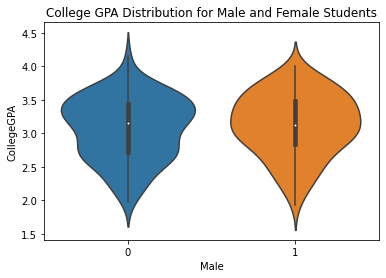

In [521]:
sns.violinplot(x = "Male", y = "CollegeGPA", data = data).set_title("College GPA Distribution for Male and Female Students")

The provided violin plot above is based on the gender column of the original data table, and it is split into two plots depending on either male or female. It is very much similar to a box plot, but instead of only showing 5 number summary, volin plot can show the visulization of the entire data set better than a box plot. In this violin plot, the gender is differentiated by the color, where oriange color on the right represents male student college GAP and blue on the left representes female in this case. The distribution of the plot looks symmetric for both male and female. Looking at the shape of plot, the fatter plot gets, the more data set cluster here. In our case, both male and female students have college GPA centered between 3.0 to 3.5.

Text(0.5, 1.0, 'College GPA Distribution for First-Generation and non-First Generation Students')

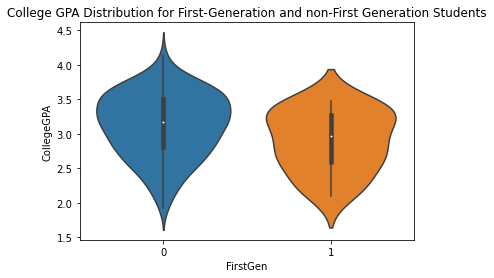

In [522]:
sns.violinplot(x = "FirstGen", y = "CollegeGPA", data = data).set_title("College GPA Distribution for First-Generation and non-First Generation Students")

In this data set, we also include a column called FirstGen, which determines if the student is native American or immigrated from somewhere else. This set can be useful for students who grew up in some other countries and are pursuing college degrees in the US. Comparing native American students in blue to First generation students in orange side by side, we can see the significant changes in the data. The highest GPA among those students who are first generation in the US is around 4.0 while native students have the highest GPA around 4.5. There can be many different factors that affect the relation, but one important reason might be the language issues.

Text(0.5, 1.0, 'College GPA Distribution for White and non-White Students')

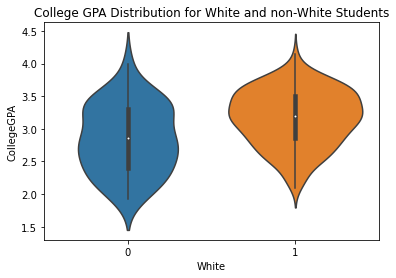

In [523]:
sns.violinplot(x = "White", y = "CollegeGPA", data = data).set_title("College GPA Distribution for White and non-White Students")

This plot is to compare the college GPA between white American in orange on right and students in different race groups side by side. We can see the shape of the violin plot for white students is significantly wider between GPA of 3.0 and 3.5 than students in different race groups. The data for students who are non-white cluster between GPA of 2.0 to 3.5 in majority. This tells us that white students normally have higher GPA in college than students in any other race group. 

/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


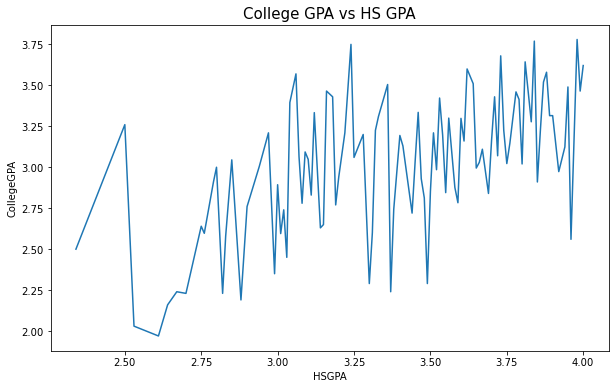

In [524]:
plt.figure(figsize = (10, 6))
plt.title("College GPA vs HS GPA", fontsize = 15)
sns.lineplot(data.HSGPA, data.CollegeGPA, ci = None)
plt.show()

The data set we use in this project also includes a column of high school GPA, so we can compare individual GPA between College and high school. Based on this show, it might not be obvious what the plot tries to show. However,  even though the line is going up and down, we can still see the trend that whoever earns a high GPA in high school would most likely be earning a higher GPA in college. 

Linear Regression Line: y = 0.5518673805897356x+1.1915202488283838, where y is College GPA and x is HS GPA
R-Squared Value: 0.19649080199585178


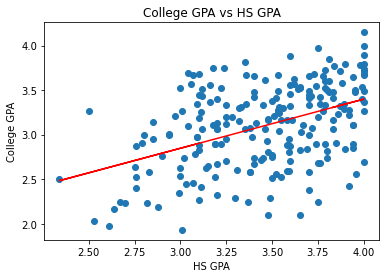

In [525]:
# A linear relationship between `x` and `y`. (same as before)
ind = []
dep = []
for index, row in data.iterrows():
    ind.append([row["HSGPA"]])
    dep.append(row["CollegeGPA"])
#linear regression plot and calculations
lm = linear_model.LinearRegression()
lm.fit(ind,dep)
fig, ax = plt.subplots()
ax.scatter(ind, dep)
ax.set_xlabel("HS GPA")
ax.set_ylabel("College GPA")
ax.set_title("College GPA vs HS GPA")
ax.plot(ind, lm.predict(ind), color = "red")
slope = lm.coef_
intercept = lm.intercept_
r_sq = lm.score(ind, dep)
print("Linear Regression Line: y = " + str(slope[0]) + "x" + (str(intercept) if intercept < 0 else "+" + str(intercept)) + ", where y is College GPA and x is HS GPA")
print("R-Squared Value: " + str(r_sq))

The regression line for college GPA vs HS GPA demonstrates a general correlation between the two. However, there is still a lot of scatter around the line. The r-squared value is not very high, demonstrating that there is not a lot of correlation between the two variables. This was a bit surprising, since we expected high school GPA to be a very good indicator of first year college GPA due to our perceived similarity of a student's ability to perform in both contexts.

[Text(0, 0.5, 'CollegeGPA'),
 Text(0, 1.5, 'HSGPA'),
 Text(0, 2.5, 'SATV'),
 Text(0, 3.5, 'SATM'),
 Text(0, 4.5, 'Male'),
 Text(0, 5.5, 'HU'),
 Text(0, 6.5, 'SS'),
 Text(0, 7.5, 'FirstGen'),
 Text(0, 8.5, 'White'),
 Text(0, 9.5, 'CollegeBound')]

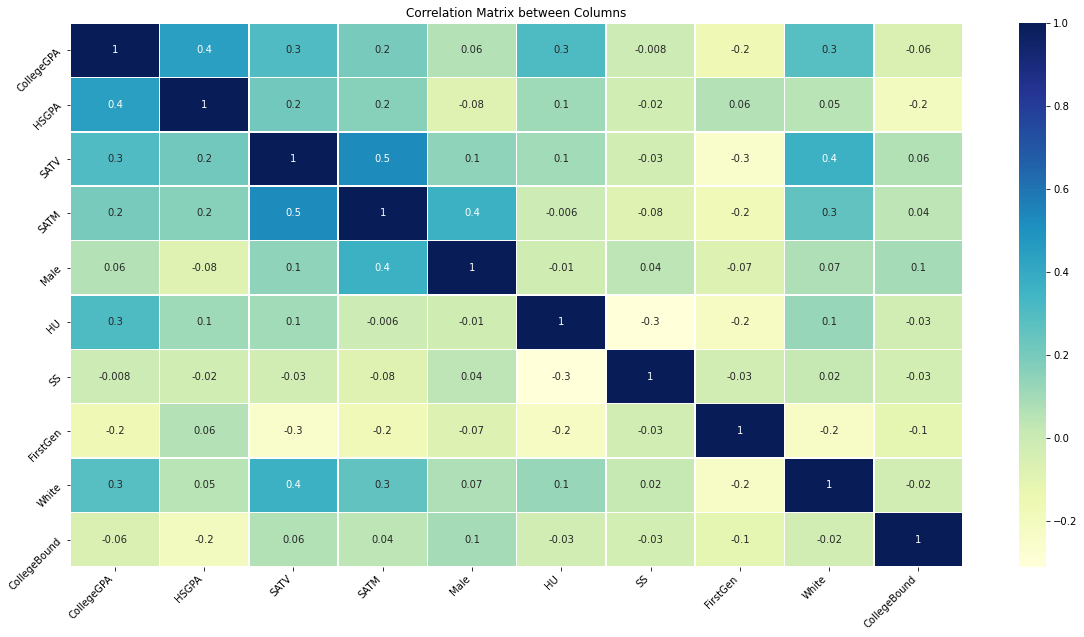

In [526]:
#Correlation Matrix
plt.subplots(figsize = (20, 10))
g = sns.heatmap(data.corr(), annot = True, cmap = "YlGnBu", fmt = '.1g', linewidths=.5,)

g.set_title("Correlation Matrix between Columns")
g.set_xticklabels(g.get_xticklabels(), rotation = 45, horizontalalignment = "right")
g.set_yticklabels(g.get_yticklabels(), rotation = 45, horizontalalignment= "right")

This is a correlation matrix demonstrating how strongly each pair of variables correlates. We will use it later to determine what features to examine in our analysis below.

## Hypothesis Testing and Machine Learning

Now that we have analyzed our data for patterns, we have an idea of what sorts of trends exist in the data. For the second part of this tutorial, we will perform Hypothesis Testing and Machine Learning on our dataset to try to accurately predict whether a given student is white based on his/her other related features.

### Hypothesis Testing
Hypothesis Testing is a statistical method which tells us whether or not a model we have is an accurate fit of the given data. Generally, we hypothesize against what we aim to conclude and perform our tests with this assumption. This is called the null hypothesis. If we yield a probability of less than 0.05 (the conventioanlly accepted significance level) of seeing results at least as extreme as our results, we reject the null hypothesis and conclude that the alternative hypothesis, which is the opposite of the null. As an example, let's say we know a coin is biased (70% heads and 30% tails, let's say) and want to affirmatively conclude this. We assume our null hypothesis, which is that the coin is fair, and perform some experiment, such as throwing our coin 1000 times. If we see results that have less than 0.05 probability of showing up assuming the coin is fair, we can conclude that the coin is not fair.

In the context of this project, we will be using hypothesis testing to conclude whether or not there exists correlations between different features and a particular target feature, which in this case is whether or not a student is white. We will be using logistic regression since the variable in question is a categorical variable (discrete number of outcomes). 

The code below runs logistic regression on our data. Only features which have 0.2 correlation or more with the "White" column (see the correlation matrix above) are included so that unrelated features will not mess up the data. These features are CollegeGPA, SATV, SATM, and FirstGen. 

In [527]:
#calling logit function to run logistic regression
reg = logit("White ~ CollegeGPA + SATV + SATM + FirstGen", data).fit()
reg.summary()

Optimization terminated successfully.
         Current function value: 0.423672
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  White   No. Observations:                  218
Model:                          Logit   Df Residuals:                      213
Method:                           MLE   Df Model:                            4
Date:                Mon, 17 May 2021   Pseudo R-squ.:                  0.1778
Time:                        20:32:28   Log-Likelihood:                -92.360
converged:                       True   LL-Null:                       -112.33
Covariance Type:            nonrobust   LLR p-value:                 4.442e-08
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -7.7303      2.005     -3.855      0.000     -11.661      -3.800
CollegeGPA     1.0625      0.414      2.565      0.010       0.251       1.875
SATV           0.0073      0.003      2.705      0.007       0.002       0.013
SATM           0.0027      0.003      0.959      0.338      -0.003       0.008
FirstGen      -0.9159      0.509     -1.801      0.072      -1.913       0.081
==============================================================================
"""

As we can see in the results, the p-values for CollegeGPA and SATV are both below 0.05. This means we reject the null hypothesis that being white and college GPA + SAT verbal score are unrelated and conclude that there is a relationship. However, we cannot say the same about the other two features, SAT Math and being first generation, since the p-values for those features are above 0.05. However, the LLR p-value, which denotes how likely it is that there is no relationship between being white and all four features that are examined, is way smaller than 0.05. Therefore, we can conclude that there is a relationship between the four features examined and being white.

### Machine Learning

We will also utilize machine learning to analzye and make a model out of our data. Machine learning looks for patterns in training data and makes a model to make predictions about future data. Supervised machine learning, which is what we will use, attempts to make a model to predict a particular feature of a given datum point given the values of its other features. It learns by examining data whose feature values are all known and makes a model out of the training data depending on what algorithm is used. As an example, we may want to predict whether a file is a malware file given information about it such as file size, amount of time spent editing, etc... Supervied learning models can accomplish this. In this tutorial, the k-NN Classification and Random Forest Classification Algorithms will be used. We will aim to make a model out of related features of a student (College GPA, SAT verbal score, SAT math score, first generation status) to predict whether or not they are white.


The following function is used to label bar plots. It will be used later to display results of our machine learning tests.

In [528]:
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate("{}".format(height),
            xy = (rect.get_x() + rect.get_width() / 2, height),
            xytext = (0, 3), # 3 points vertical offset
            textcoords = "offset points",
            ha = "center", va = "bottom")

The k-NN Classification Algorithm will be used to make a model out of our data. The aim is to predict whether a student is white given values of the other correlated features, which are the student's college gpa, sat verbal score, sat math score, and first generation status. The k-NN Algorithm works as follows: 

The algorithm will find the k data points in the training set whose known feature values are as “close” as possible to the data point in question. The algorithm determines how close the values of the known features are by a simple Euclidean distance computation. The numerical difference in values of each of the known features is calculated, squared, and summed up. The square root of the result is the difference between the two data points. 

Once the difference values are obtained with each data point in the training set, the k data points with smallest difference value from the data point in question are selected. K is a parameter that is chosen by the user and given to the algorithm. A higher k-value will likely result in more accurate predictions but requires more computational time. An appropriate k-value can be chosen according to the context. Since the values of the target feature are also given in the training set, the algorithm can take the values of the target features in the k selected data points. Using these values, the prediction for the target feature of the queried data point is calculated. If the target feature is a categorical variable (finite number of possible outcomes), the mode value from the training dataset target feature values is taken as the prediction. Otherwise, if the target feature is a continuous variable, the mean of these values is taken as the prediction. More information about the algorithm can be found here: https://towardsdatascience.com/machine-learning-basics-with-the-k-nearest-neighbors-algorithm-6a6e71d01761

The code below splits our data into a training set and a test set. The k-NN Algorithm is run on the training set to produce a model.Then, the points in the test set are fed into the model and the model's performance on the test set is assessed. 

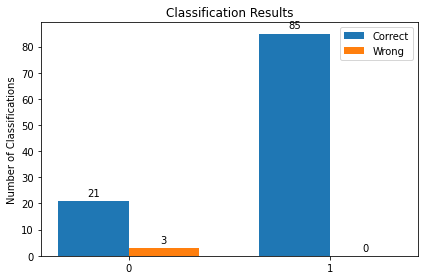

In [529]:
#k-NN Classification
from sklearn.neighbors import KNeighborsClassifier

#dropping unrelated features
data2 = data
data = data.drop(["SATM", "Male", "HU", "SS", "CollegeBound"], axis = 1)

#splitting and preparing data
x = np.array_split(data, 2)
y = np.array_split(data["White"], 2)

trainx = x[0]
testx = x[1]
trainy = y[0]
testy = y[1]

newtrainy = np.array([1]).astype(int)
newtesty = np.array([0]).astype(int)
for i in range(testy.size):
    newtrainy = np.append(newtrainy, int(trainy.get(i)))
    newtesty = np.append(newtesty, int(testy.get(i + 109)))
trainy = newtrainy
testy = newtesty
trainy = trainy.astype(int)
trainy = np.delete(trainy, 0)
testy = np.delete(testy, 0)

#running k-NN
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(sklearn.preprocessing.normalize(trainx), trainy)
estimate = knn.predict(testx)

#counting number of correct and incorrect predictions for both white and non-white
stats = [0, 0, 0, 0]
for i in range(testy.size):
    if testy[i] == 0:
        if estimate[i] == 0:
            stats[0] += 1
        else:
            stats[1] += 1
    else:
        if estimate[i] == 1:
            stats[2] += 1
        else:
            stats[3] += 1
labels = ['0', '1']
men_means = [stats[0], stats[2]]
women_means = [stats[1], stats[3]]
x = np.arange(len(labels)) # the label locations
width = 0.35 # the width of the bars
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_means, width, label='Correct')
rects2 = ax.bar(x + width/2, women_means, width, label='Wrong')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of Classifications')
ax.set_title('Classification Results')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
autolabel(rects1)
autolabel(rects2)
fig.tight_layout()
#final plot
plt.show()


Our k-NN Classification Algorithm was able to correctly predict 85/85 of white students and 21/24 of non-white students. The following analysis uses cross-validation to get the accuracy and standard deviation of the results of our test.

In [530]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(knn, data, data["White"])
print("Accuracy: " + str(scores.mean()) + " - Standard deviation: " + str(scores.std() * 2))

Accuracy: 0.8442917547568711 - Standard deviation: 0.06544902763397453


As we can see, the accuracy of our k-NN test is 84.83% +- 6.54%. These values are a little lower than expected given the algorithm's performance on our testing dataset, but still demonstrate that the model is quite accurate.

The Random Forest Classification Algorithm is the second supervised learning algorithm that we will use to analyze our data. Like the k-NN algorithm, the Random Forest Classification algorithm also aims to predict the value of a target feature given values of the other known features. However, it predicts the value of the target feature differently. 

In this algorithm, a number of decision trees are constructed based on the training data. Each decision tree is constructed as follows: Randomly select a subset of known features and a random subset of data points (with possible repetition for the data points). Given these parameters, build a decision tree by splitting up the data points according to the chosen features (picking the best feature at each node from a randomly chosen subset of possible remaining features, where “best” splits up the data points as evenly as possible). In the end, each leaf node has different feature properties and the data points in each leaf node all contain the same classification (the same value for their target features). The randomness is to ensure that each tree is as uncorrelated as possible, and this gives more power to the result when the uncorrelated trees are combined. 

The algorithm then examines the data point in question. For each decision tree, the algorithm follows the correct path down to a leaf node according to the values of the labeled features of the data point in question. The classification value at the leaf node is taken. After repeating this for all the trees, the mode of the resulting values is the predicted value for the target feature of the data point in question. The number of trees to be used can be chosen depending on the context. More trees will require more computational time but will likely result in a better model. More information can be found here: https://builtin.com/data-science/random-forest-algorithm

The code below runs the random forest classification algorithm on our dataset.

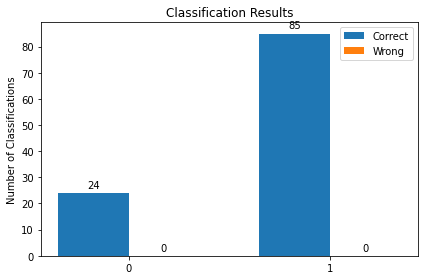

In [531]:
#Random Forest Classification
from sklearn.ensemble import RandomForestClassifier

#dropping unrelated features
data = data2.drop(["SATM", "Male", "HU", "SS", "CollegeBound"], axis = 1)

#splitting data into training and test sets
x = np.array_split(data, 2)
y = np.array_split(data["White"], 2)

trainx = x[0]
testx = x[1]
trainy = y[0]
testy = y[1]

newtrainy = np.array([1]).astype(int)
newtesty = np.array([0]).astype(int)
for i in range(testy.size):
    newtrainy = np.append(newtrainy, int(trainy.get(i)))
    newtesty = np.append(newtesty, int(testy.get(i + 109)))
trainy = newtrainy
testy = newtesty
trainy = trainy.astype(int)
trainy = np.delete(trainy, 0)
testy = np.delete(testy, 0)

#running Random Forest Algorithm
clf = RandomForestClassifier(n_estimators = 9).fit(trainx, trainy)
estimate = clf.predict(testx)

#counting number of correct and incorrect predictions of both white and non-white students
stats = [0, 0, 0, 0]
for i in range(testy.size):
    if testy[i] == 0:
        if estimate[i] == 0:
            stats[0] += 1
        else:
            stats[1] += 1
    else:
        if estimate[i] == 1:
            stats[2] += 1
        else:
            stats[3] += 1
labels = ['0', '1']
men_means = [stats[0], stats[2]]
women_means = [stats[1], stats[3]]
x = np.arange(len(labels)) # the label locations
width = 0.35 # the width of the bars
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_means, width, label='Correct')
rects2 = ax.bar(x + width/2, women_means, width, label='Wrong')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of Classifications')
ax.set_title('Classification Results')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
autolabel(rects1)
autolabel(rects2)
fig.tight_layout()
#final plot
plt.show()


As we see in the plot, our random forest classification algorithm was able to correctly predict 85/85 white students and 24/24 non-white students given information about their college GPA, sat math score, sat verbal score, and first generation status.

In [532]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(clf, data, data["White"])
print("Accuracy: " + str(scores.mean()) + " - Standard deviation: " + str(scores.std() * 2))

Accuracy: 1.0 - Standard deviation: 0.0


Our model has an accuracy of 99.55% +- 1.82%. This is much better than the k-NN Algorithm and demonstrates very good accuracy.

## Conclusion

From the work done here, we have observed many relationships among the data. For one, a student's gender and first generation status did not seem to significantly affect their first year college GPA, but white students seemed to have better grades than non-white students based on the resulting distributions. We also observed that high school GPA and college GPA aren't as correlated as we initially thought, even though there was still a general trend of increase in one variable as the other increased.

The accuracy with which the k-NN Algorithm and the Random Forest Classification Algorithm were able to predict whether a student is white given other related features was quite surprising. The Random Forest Classification was able to predict every value in our testing dataset and also had an accuracy of 99.5% after cross-validation. While we did select particular features to use that correlated more strongly with a student's white status, the results from the model were still astonishingly accurate. 

In the future, it may be possible to study the effect of different features of a student on other categorical variables, such as sex and gender. Given the consistency of the results obtained here, it wouldn't be that surprising if ML algorithms could also come up with very good models for those variables. Overall, this was a very enjoyable project and hopefully has demonstrated some previously unknown relationships between different characteristics of students.